In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Synthetic Data Water Quality 10000 and 17F.csv')

In [3]:
df['Potability'] = df['Potability'].map({'potable': 1, 'non-potable': 0})

In [4]:
df.dropna(inplace=True)

In [5]:
def calculate_SAR(df):
    # Convert mg/L to meq/L
    df['Na_meq'] = df['Sodium (mg/l)'] / 23
    df['Ca_meq'] = df['Calcium (mg/l)'] / 20
    df['Mg_meq'] = df['Magnesium (mg/l)'] / 12.15
    
    # Calculate SAR
    df['SAR'] = df['Na_meq'] / ((df['Ca_meq'] + df['Mg_meq']) / 2) ** 0.5
    
    return df

In [6]:
df = calculate_SAR(df)

In [7]:
def calculate_ssp(df):
    # Convert mg/L to meq/L for necessary ions
    df['Na_meq'] = df['Sodium (mg/l)'] / 23
    df['Ca_meq'] = df['Calcium (mg/l)'] / 20
    df['Mg_meq'] = df['Magnesium (mg/l)'] / 12.15
    df['K_meq'] = df['Potassium (mg/l)'] / 39.1
    
    # Calculate SSP
    df['SSP'] = (df['Na_meq'] / (df['Ca_meq'] + df['Mg_meq'] + df['Na_meq'] + df['K_meq'])) * 100
    
    return df

# Example usage
df = calculate_ssp(df)

In [8]:
def calculate_kr(df):
    # Convert mg/L to meq/L for necessary ions
    df['Na_meq'] = df['Sodium (mg/l)'] / 23
    df['Ca_meq'] = df['Calcium (mg/l)'] / 20
    df['Mg_meq'] = df['Magnesium (mg/l)'] / 12.15
    
    # Calculate KR
    df['KR'] = df['Na_meq'] / (df['Ca_meq'] + df['Mg_meq'])
    
    return df

# Example usage
df = calculate_kr(df)

In [9]:
def calculate_sodium_percentage(df):
    # Convert mg/L to meq/L for necessary ions
    df['Na_meq'] = df['Sodium (mg/l)'] / 23
    df['Ca_meq'] = df['Calcium (mg/l)'] / 20
    df['Mg_meq'] = df['Magnesium (mg/l)'] / 12.15
    df['K_meq'] = df['Potassium (mg/l)'] / 39.1
    
    # Calculate Sodium Percentage
    df['Sodium_Percentage'] = (df['Na_meq'] / (df['Ca_meq'] + df['Mg_meq'] + df['Na_meq'] + df['K_meq'])) * 100
    
    return df

# Example usage
df = calculate_sodium_percentage(df)

In [10]:
def calculate_magnesium_hazard(df):
    # Calculate MH using the formula
    MH = (df['Magnesium (mg/l)'] / 12.15) / ((df['Calcium (mg/l)'] / 20) + (df['Magnesium (mg/l)'] / 12.15)) * 100
    
    return MH

# Calculate MH
df['MH'] = calculate_magnesium_hazard(df)

In [11]:
import pandas as pd
import numpy as np

# Let's assume bicarbonate has a similar correlation pattern to Total Dissolved Solids (TDS)
# You might want to use a linear combination of TDS and some noise to simulate this
np.random.seed(42)  # For reproducibility

# Generate bicarbonate values based on TDS
mean_bicarbonate = df['Total Dissolved Solids (mg/l)'] / 100  # Example linear relationship
noise = np.random.normal(0, 0.1, size=mean_bicarbonate.shape)  # Adding some noise
df['Bicarbonate (meq/l)'] = mean_bicarbonate + noise

# Ensure values are realistic (e.g., non-negative)
df['Bicarbonate (meq/l)'] = df['Bicarbonate (meq/l)'].clip(lower=0)

In [12]:
# Assuming bicarbonate values have already been added to the DataFrame
# Convert calcium and magnesium from mg/l to meq/l (1 meq Ca = 20.04 mg, 1 meq Mg = 12.15 mg)
df['Ca_meq'] = df['Calcium (mg/l)'] / 20.04
df['Mg_meq'] = df['Magnesium (mg/l)'] / 12.15

# Calculate RSC
df['RSC'] = df['Bicarbonate (meq/l)'] - (df['Ca_meq'] + df['Mg_meq'])

In [13]:
import pandas as pd
import numpy as np

# Generate realistic carbonate values
# For simplicity, let's assume carbonate is 10% of bicarbonate values plus some noise
np.random.seed(42)  # For reproducibility

# Generate carbonate values based on bicarbonate
df['Bicarbonate (meq/l)'] = (df['Total Dissolved Solids (mg/l)'] / 100) + np.random.normal(0, 0.1, df.shape[0])
df['Carbonate (meq/l)'] = (0.1 * df['Bicarbonate (meq/l)']) + np.random.normal(0, 0.01, df.shape[0])

# Ensure values are realistic (e.g., non-negative)
df['Bicarbonate (meq/l)'] = df['Bicarbonate (meq/l)'].clip(lower=0)
df['Carbonate (meq/l)'] = df['Carbonate (meq/l)'].clip(lower=0)

# Convert calcium and magnesium from mg/l to meq/l (1 meq Ca = 20.04 mg, 1 meq Mg = 12.15 mg)
df['Ca_meq'] = df['Calcium (mg/l)'] / 20.04
df['Mg_meq'] = df['Magnesium (mg/l)'] / 12.15

# Calculate RSC
df['RSC'] = (df['Bicarbonate (meq/l)'] + df['Carbonate (meq/l)']) - (df['Ca_meq'] + df['Mg_meq'])

In [14]:
# Calculate PI
df['PI'] = ((df['Na_meq'] + (df['Bicarbonate (meq/l)'] ** 0.5)) / (df['Ca_meq'] + df['Mg_meq'] + df['Na_meq'])) * 100

In [15]:
df.describe()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),...,SAR,K_meq,SSP,KR,Sodium_Percentage,MH,Bicarbonate (meq/l),RSC,Carbonate (meq/l),PI
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.006526,5.003388,7.337763,1502.148272,1001.183584,300.613398,0.200808,249.491721,0.300165,200.793553,...,3.136493,1.274635,33.661335,0.670239,33.661335,52.123643,10.011814,-4.701732,1.001333,51.020893
std,8.717615,2.906118,3.101412,869.812955,578.522848,171.478482,0.115359,144.526095,0.174572,116.039382,...,1.539802,0.736458,12.848925,1.071585,12.848925,17.708241,5.784999,5.089465,0.578674,17.046313
min,0.010000,0.000000,0.000000,0.120000,0.050000,0.030000,0.000000,0.000000,0.000000,0.010000,...,0.000202,0.000000,0.004192,0.000047,0.004192,0.056028,0.000000,-20.231355,0.000000,2.867896
25%,7.517500,2.490000,6.397500,741.635000,494.590000,154.980000,0.100000,122.707500,0.150000,99.890000,...,2.266398,0.626343,27.575668,0.409656,27.575668,44.104050,4.942933,-8.342243,0.494663,41.894242
50%,15.000000,5.000000,7.470000,1500.095000,1000.030000,300.005000,0.200000,249.915000,0.300000,199.995000,...,3.248650,1.278517,33.966875,0.556777,33.966875,52.374922,10.010887,-4.731331,1.000434,47.947224
75%,22.660000,7.530000,8.480000,2259.740000,1497.880000,448.605000,0.300000,374.760000,0.450000,303.645000,...,4.163368,1.919182,39.900922,0.721443,39.900922,60.551197,14.976011,-1.102928,1.498003,55.923816
max,30.000000,10.000000,14.000000,2999.910000,1999.960000,599.970000,0.400000,499.870000,0.600000,399.980000,...,35.635306,2.557545,94.429585,75.416043,94.429585,99.982067,20.186652,10.442013,2.031095,255.703715


In [16]:
df = df[df['KR'] <= 1]

In [17]:
#df = df[df['SAR'] <= 7]

In [18]:
df = df[(df['PI'] >= 10) & (df['PI'] <= 70)]

In [19]:
#df = df[(df['MH'] >= 10) & (df['MH'] <= 90)]

In [20]:
#df = df[(df['SSP'] >= 10) & (df['SSP'] <= 50)]

In [21]:
# Define the columns to be used
columns = ['RSC', 'PI', 'KR', 'MH', 'Sodium (mg/l)', 'SAR', 'SSP', 'Conductivity (uS/cm)']

# Normalization function (0-100 scale)
def normalize(series):
    return 100 * (series - series.min()) / (series.max() - series.min())

# Apply normalization to each column
for column in columns:
    df.loc[:, column + '_norm'] = normalize(df[column])

# Define the weights
weights = {
    'RSC_norm': 0.1054,
    'PI_norm': 0.0878,
    'KR_norm': 0.1520,
    'MH_norm': 0.0777,
    'Sodium (mg/l)_norm': 0.2264,
    'SAR_norm': 0.1824,
    'SSP_norm': 0.1453,
    'Conductivity (uS/cm)_norm': 0.0236
}

# Calculate the IWQI
df['IWQI'] = sum(df[column] * weight for column, weight in weights.items())

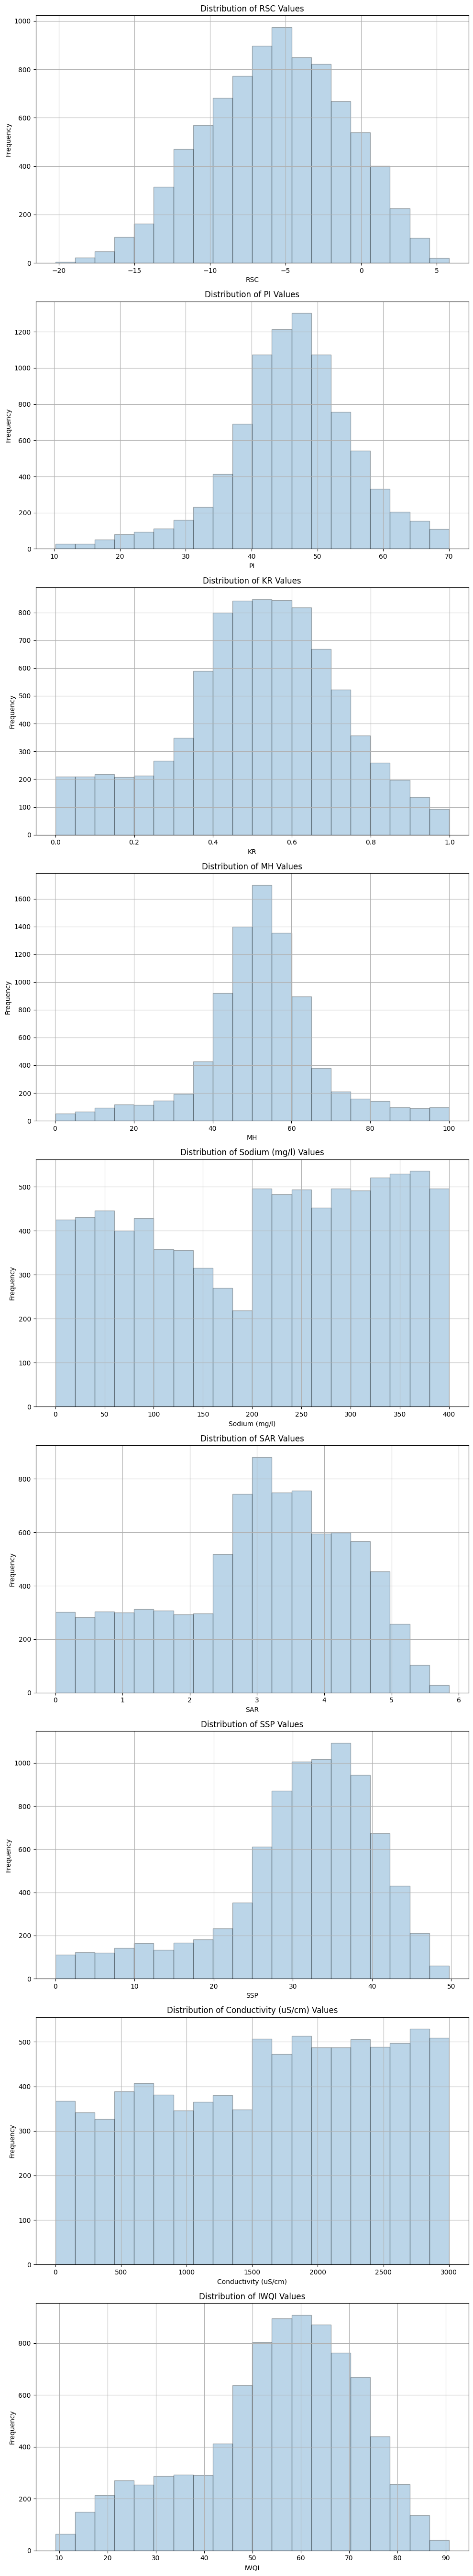

In [22]:
import matplotlib.pyplot as plt

# Define the columns to be plotted
columns = ['RSC', 'PI', 'KR', 'MH', 'Sodium (mg/l)', 'SAR', 'SSP', 'Conductivity (uS/cm)', 'IWQI']

# Create subplots for each parameter
fig, axs = plt.subplots(len(columns), 1, figsize=(10, 6 * len(columns)))

# Plot each parameter's distribution
for i, column in enumerate(columns):
    axs[i].hist(df[column], bins=20, edgecolor='black', alpha=0.3)
    axs[i].set_title(f'Distribution of {column} Values')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()



In [53]:
# Add a new column 'usable' based on IWQI values
df['usable'] = df['IWQI'].apply(lambda x: 1 if x > 50 else 0)

In [54]:
df.to_csv('output6.csv', index=False)

In [56]:
import pandas as pd

# Load your existing dataset
file_path = "output6.csv"
data = pd.read_csv(file_path)

# Select specific columns
selected_columns = ['MH', 'RSC', 'SAR', 'Conductivity (uS/cm)', 'KR', 'PI', 'SSP', 'Sodium (mg/l)', 'IWQI', 'usable']
selected_data = data[selected_columns]

# Save selected data to a new CSV file
new_file_path = "water_quality_data2.csv"
selected_data.to_csv(new_file_path, index=False)

print(f"New CSV file saved with selected columns: {new_file_path}")


New CSV file saved with selected columns: water_quality_data2.csv


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [58]:
file_path = "water_quality_data2.csv"
data = pd.read_csv(file_path)

In [59]:
# Step 2: Prepare data
X = data.drop('usable', axis=1)  # Features (input columns)
y = data['usable']               # Target (output column)

In [60]:
# Step 3: Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [62]:
# Step 5: Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Step 6: Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
# Step 7: Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [67]:
# Step 5: Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.05)),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])


In [68]:

# Step 6: Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 7: Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9234 - loss: 2.5258 - val_accuracy: 0.9659 - val_loss: 0.2558
Epoch 2/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9639 - loss: 0.2676 - val_accuracy: 0.9855 - val_loss: 0.2199
Epoch 3/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9638 - loss: 0.2377 - val_accuracy: 0.9792 - val_loss: 0.2064
Epoch 4/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9646 - loss: 0.2242 - val_accuracy: 0.9844 - val_loss: 0.1987
Epoch 5/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9642 - loss: 0.2148 - val_accuracy: 0.9682 - val_loss: 0.1964
Epoch 6/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9632 - loss: 0.2114 - val_accuracy: 0.9855 - val_loss: 0.1824
Epoch 7/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9698 - loss: 0.1983 - val_accuracy: 0.9786 - val_loss: 0.1790
Epoch 8/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9679 - loss: 0.1967 - val_accuracy: 0.

In [69]:
# Assuming 'model' is your trained Keras model

# Define the file path where you want to save the model
model_path = "water_quality_model3.h5"

# Save the model
model.save(model_path)

print(f"Model saved to: {model_path}")


Model saved to: water_quality_model3.h5


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load your updated dataset
updated_file_path = "IrrigationWater_Final_Dataset_updated.csv"
data = pd.read_csv(updated_file_path)

# Select the same features used for training the model
selected_features = ['MH', 'RSC', 'SAR', 'Conductivity (uS/cm)', 'KR', 'PI', 'SSP', 'Sodium (mg/l)', 'IWQI']

X_test = data[selected_features]
y_test = data['usable']

# Normalize the data using the same scaler used during training
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Load the saved model
model_path = "water_quality_model3.h5"
model = load_model(model_path)

# Evaluate model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy on updated dataset: {accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8660 - loss: 0.4631
Test Accuracy on updated dataset: 0.8033707737922668
